In [ ]:
!pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3959 sha256=64003cbcb0a99157274e29f91412de50bbfc3960d9ca14e7448c79353da27671
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
!pip install pdfminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140079 sha256=910acf32b23cc5e6a20b72ce9fbb5383667f9b8f12cef5460180870444d9ac71
  Stored in directory: /root/.cache/pip/wheels/4e/c1/68/f7bd0a8f514661f76b5cbe3b5f76e0033d79f1296012cbbf72
Successfully built pdfminer


In [ ]:
!pip install pdfreader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 18.3 MB/s eta 0:00:00
  Created wheel for pdfreader: filename=pdfreader-0.1.12-py3-none-any.whl size=134541 sha256=76590537c6dbb9c3ef8c3996f03ce767123f06c57a65fa74ac69466fddfd5522
  Stored in directory: /root/.cache/pip/wheels/92/7d/f1/8b8a503d8b444a82e4c3c8b1230c02316c7579b90542de4495
Successfully built pdfreader


In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


**Read PDF Resume**

In [ ]:
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

In [ ]:
def read_pdf_resume(pdf_doc):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)

    with open(pdf_doc, 'rb') as fh:
        for page in PDFPage.get_pages(fh,
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)

        text = fake_file_handle.getvalue()

    # close open handles
    converter.close()
    fake_file_handle.close()

    if text:
        return text

In [ ]:
read_pdf_resume("Rohit CV.pdf")

"Rohit Rewapati A diligent M.Sc. (Data Science & Analytics) student at DAVV's School of Data Science & Forecasting. Seeking opportunities to apply myanalytical and technical skills to real-world problem solving. rrewapati38@gmail.com +91 8989021722 Indore, India linkedin.com/in/rohit-rewapati SKILLS Python R-programming Tableau Power BI MySQL Advanced Excel Web Mining SPSS LANGUAGES English Full Professional Proﬁciency Hindi Native or Bilingual Proﬁciency INTERESTS Cricket Football Music EDUCATION M.Sc.(Data Science & Analytics) School of Data Science and Forecasting - DAVV 08/2022 - Present,  Indore, India. B.Sc.(Applied Statistics & Analytics) School of Statistics - DAVV 08/2019 - 06/2022,  Indore, India. WORK EXPERIENCE Business Development Executive Mxpertz Infolabs 07/2023 - Present,  Indore Driving sales by sourcing new clients. Suggesting upgrades or added products and services that may be of interest to clients. Remaining in tune with trends in consumption to ensure that our oﬀ

**Read Word Resume**

In [ ]:
import docx2txt

In [ ]:
def read_word_resume(word_doc):
    #resume = docx2txt.process(word_doc)
    #text = ''.join(resume)
    resume = docx2txt.process(word_doc)
    resume = str(resume)
    #print(resume)
    text =  ''.join(resume)
    text = text.replace("\n", "")

    if text:
        return text

**Cleaning**

In [ ]:
import re

In [ ]:
def clean_job_decsription(jd):
        ## Clean the Text
    # Lower
    clean_jd = jd.lower()
    # remove punctuation
    clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
    # remove trailing spaces
    clean_jd = clean_jd.strip()
    # remove numbers
    clean_jd = re.sub('[0-9]+', '', clean_jd)
    # tokenize
    clean_jd = word_tokenize(clean_jd)
    # remove stop words
    stop = stopwords.words('english')
    #stop.extend(["AT_USER","URL","rt","corona","coronavirus","covid","amp","new","th","along","icai","would","today","asks"])
    clean_jd = [w for w in clean_jd if not w in stop]

    return(clean_jd)

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import operator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
    #print(cosine_similarity(count_matrix))
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
    print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

In [ ]:
def create_word_cloud(jd):
    corpus = jd
    fdist = FreqDist(corpus)
    #print(fdist.most_common(100))
    words = ' '.join(corpus)
    words = words.split()

    # create a empty dictionary
    data = dict()
    #  Get frequency for each words where word is the key and the count is the value
    for word in (words):
        word = word.lower()
        data[word] = data.get(word, 0) + 1
    # Sort the dictionary in reverse order to print first the most used terms
    dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))
    word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 500)
    word_cloud.generate_from_frequencies(data)
    # plot the WordCloud image
    plt.figure(figsize = (10, 8), edgecolor = 'k')
    plt.imshow(word_cloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Enter File Extension: pdf

Enter the Job Description: We are looking for a results-driven software tester to be responsible for designing and running tests on software usability. The software tester will conduct tests, analyze the results, and report observations to the design team. You may also interact with clients in order to understand the requirements of the product.  To be successful as a software tester, you should have a working knowledge of software and test design, the capability to run through tests, and the ability to analyze the results. Ultimately, the software tester should be result-driven, have good communication skills, and up-to-date knowledge of software programming and software test design.  Software Tester Responsibilities: Reviewing software requirements and preparing test scenarios. Executing tests on software usability. Analyzing test results on database impacts, errors or bugs, and usability. Preparing reports on all aspects related to the software testing car

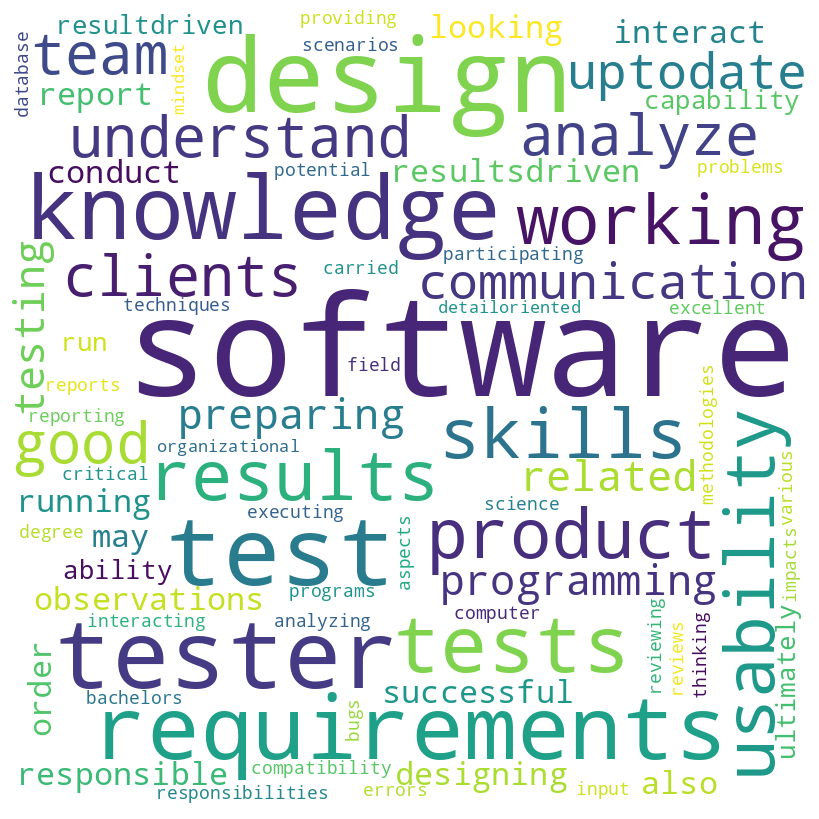


Similarity Scores:
Your resume matches about 9.72% of the job description.


In [ ]:
if __name__ == '__main__':
    extn = input("Enter File Extension: ")
    #print(extn)
    if extn == "pdf":
        resume = read_pdf_resume('Deepesh.pdf')
    else:
        resume = read_word_resume('test_resume.docx')

    job_description = input("\nEnter the Job Description: ")

    ## Get a Keywords Cloud
    clean_jd = clean_job_decsription(job_description)
    create_word_cloud(clean_jd)

    text = [resume, job_description]

    ## Get a Match
    get_resume_score(text)

# New Section